In [35]:
import pandas as pd
import numpy as  np
import os
file_list = [file for file in os.listdir('./Sales Data/Sales_Data')]
all_months_data = pd.DataFrame()

for file in file_list:
    df = pd.read_csv('./Sales Data/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv('All_data.csv',index = False)
all_months_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [36]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data.dropna(inplace = True)
all_months_data.reset_index(drop = True,inplace = True)
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [61]:
all_months_data['Price Each'] = all_months_data['Price Each'].astype(float,errors = "ignore")
all_months_data.dtypes

# all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'], errors='coerce')
# all_months_data.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [62]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')
all_months_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [64]:
all_months_data['Sales'] = all_months_data['Quantity Ordered']*all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [91]:
#Maximum Sales in which month
all_months_data.dropna(inplace = True)
results = all_months_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1.811768e+06,1.822257e+06
02,13449.0,2.188885e+06,2.202022e+06
03,17005.0,2.791208e+06,2.807100e+06
04,20558.0,3.367671e+06,3.390670e+06
05,18667.0,3.135125e+06,3.152607e+06
06,15253.0,2.562026e+06,2.577802e+06
07,16072.0,2.632540e+06,2.647776e+06
08,13448.0,2.230345e+06,2.244468e+06
09,13109.0,2.084992e+06,2.097560e+06


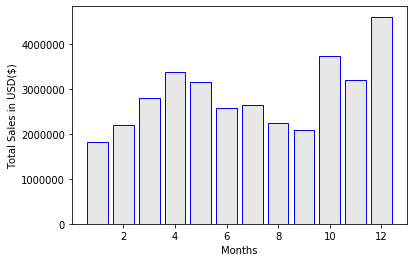

In [97]:
import matplotlib.pyplot as plt

plt.bar(range(1,13),results['Sales'],color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xlabel("Months")
plt.ylabel('Total Sales in USD($)')
plt.show()